<a href="https://colab.research.google.com/github/akita-NITH/dsp/blob/main/%E3%83%87%E3%82%A3%E3%82%B8%E3%82%BF%E3%83%AB%E4%BF%A1%E5%8F%B7%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01_自由空間損失を計算するプログラム

コメントテスト

Frequency[MHz]:2400
Max Distance[m]:1000
 
-0.02001 x - 82.16


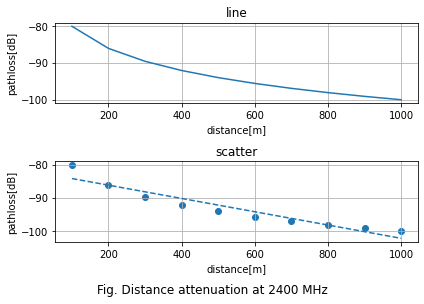

In [21]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

SPEED_OF_LIGHT = 299792458.0    # 光速[m/s]
DIV_N = 10.0  # 横軸データ分割数

# 減衰値計算
def CalcPathloss(freq, d):
    _lambda = SPEED_OF_LIGHT / freq   # 波長計算，lambdaは予約語なので_lambdaとした
    loss = (4.0*np.pi*d/_lambda)**2
    return loss

# グラフ描画
def PlotPathloss(freq, dist, loss_db):
    fig_title = "Fig. Distance attenuation at %d MHz"%(freq/(10**6))      # figureオブジェクトタイトルの内容
    fig = plt.figure()    # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    fig.suptitle(fig_title, x = 0.5, y = 0, fontfamily= 'sans-serif')        # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    ax1 = fig.add_subplot(2,1,1)     # figに属するAxesオブジェクトを作成，https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    plt.title('line')       # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    plt.xlabel('distance[m]')
    plt.ylabel('pathloss[dB]') 
    plt.grid(True)
    plt.plot(dist, loss_db, drawstyle='default')     # 折れ線グラフ，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    ax2 = fig.add_subplot(2,1,2)     # figに属するAxesオブジェクトを作成，https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    plt.title('scatter')       # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    plt.xlabel('distance[m]')
    plt.ylabel('pathloss[dB]')
    plt.grid(True)
    plt.scatter(dist, loss_db)      # 散布図，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    coefficient_1d = np.polyfit(dist, loss_db, 1)       # 線形近似係数（傾き，切片），https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit
    func_1d = np.poly1d(coefficient_1d)        # 一次式表現，https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d
    print(func_1d)
    loss_db_l = func_1d(dist)   # 一次式表現の式で縦軸データ計算
    plt.plot(dist, loss_db_l,'--' )     # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    plt.tight_layout()  #グラフ描画領域が重複しないようにレイアウト調整
    fig.savefig("test.png")
    plt.show()
 

# メイン
if __name__ == "__main__":
    # 入力部
    print("Frequency[MHz]: ", end='')
    freq = float(input()) * 10**6
    print("Max Distance[m]: ", end='')
    dist = float(input())
    # 演算部
    d = np.arange(dist/DIV_N, dist+dist/DIV_N, dist/DIV_N)     # 横軸データ生成，https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    loss = CalcPathloss(freq, d)        # 減衰量計算
    loss_db = -10.0 * np.log10(loss)        #　減衰量計算[dB]換算
    PlotPathloss(freq, d, loss_db)      # グラフ描画